In [1]:
#data collection
#RAE
import keras
from keras import backend as K
from keras.utils import Sequence
from keras.models import Sequential, Model
from keras.layers import Input, LSTM, RepeatVector
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.optimizers import SGD, RMSprop, Adam
from keras import objectives
from keras import regularizers
from sklearn.linear_model import Lasso

import numpy as np
import scipy.io
np.set_printoptions(precision = 2, suppress = True)
import os
import nibabel as nib
import pandas as pd
from nibabel import cifti2 as ci
from scipy import stats

path = "/home/qing/Documents/tfMRI_Language_preproc/"
dirs = os.listdir(path)

a = np.memmap('sub_LANGUAGE.mymemmap', dtype = 'float32', mode='w+', shape=(316*791,59421))
del a
sub = np.memmap('sub_LANGUAGE.mymemmap', dtype='float32', mode='r+', shape=(316*791,59421))
sub_data = np.memmap('sub_LANGUAGE.mymemmap', dtype='float32', mode='r+', shape=(316*791,59421))

for num1 in range(0,791):
    sub_path =  path + dirs[num1] + "/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii"
    print(sub_path)
    print(num1)
    img = nib.load(sub_path)
    img = img.get_data()
    
    img = img[:,0:59421]
    print(np.shape(img))
    sub[num1*316:(num1+1)*316, ] = img

print(sub)



Using TensorFlow backend.


/home/qing/Documents/tfMRI_Language_preproc/784565_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
0


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/196144_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
1


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/178748_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
2


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/181131_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
3


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/937160_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
4


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/203418_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
5


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/221319_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
6


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/217429_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
7


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/952863_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
8


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/123521_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
9


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/151627_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
10


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/500222_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
11


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/214726_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
12


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/204521_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
13


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/209834_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
14


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/843151_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
15


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/245333_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
16


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/724446_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
17


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/616645_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
18


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/882161_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
19


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/212823_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
20


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/310621_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
21


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/355239_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
22


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/586460_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
23


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/588565_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
24


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/108323_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
25


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/479762_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
26


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/158136_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
27


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/614439_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
28


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/198855_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
29


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/151223_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
30


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/113619_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
31


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/122822_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
32


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/700634_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
33


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/111009_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
34


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/529549_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
35


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/228434_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
36


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/647858_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
37


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/283543_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
38


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/110613_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
39


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/852455_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
40


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/199453_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
41


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/124220_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
42


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/149236_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
43


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/124826_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
44


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/139233_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
45


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/572045_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
46


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/131823_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
47


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/307127_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
48


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/877269_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
49


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/135932_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
50


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/148133_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
51


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/173334_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
52


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/397861_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
53


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/965771_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
54


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/615744_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
55


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/680250_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
56


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/224022_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
57


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/109123_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
58


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/770352_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
59


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/679568_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
60


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/116726_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
61


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/748258_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
62


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/160931_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
63


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/197348_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
64


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/101006_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
65


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/814649_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
66


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/149539_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
67


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/167743_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
68


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/177241_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
69


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/101410_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
70


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/284646_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
71


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/467351_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
72


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/128632_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
73


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/123824_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
74


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/555651_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
75


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/196346_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
76


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/117122_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
77


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/214524_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
78


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/108828_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
79


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/531536_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
80


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/164131_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
81


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/142828_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
82


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/867468_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
83


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/767464_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
84


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/131722_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
85


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/727654_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
86


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/917255_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
87


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/110007_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
88


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/246133_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
89


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/248339_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
90


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/536647_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
91


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/154835_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
92


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/481951_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
93


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/164030_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
94


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/191033_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
95


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/695768_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
96


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/311320_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
97


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/849971_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
98


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/449753_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
99


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/135528_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
100


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/134324_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
101


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/573451_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
102


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/105216_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
103


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/148436_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
104


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/561242_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
105


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/633847_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
106


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/135225_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
107


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/480141_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
108


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/298051_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
109


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/120212_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
110


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/192136_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
111


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/211720_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
112


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/129129_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
113


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/199150_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
114


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/161630_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
115


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/859671_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
116


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/130922_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
117


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/765056_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
118


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/198653_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
119


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/129331_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
120


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/611938_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
121


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/601127_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
122


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/525541_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
123


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/792766_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
124


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/731140_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
125


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/656253_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
126


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/979984_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
127


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/604537_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
128


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/972566_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
129


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/157942_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
130


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/115219_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
131


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/707749_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
132


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/705341_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
133


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/894774_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
134


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/932554_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
135


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/397154_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
136


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/115320_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
137


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/111312_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
138


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/580044_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
139


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/200614_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
140


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/131924_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
141


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/926862_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
142


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/220721_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
143


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/121618_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
144


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/645450_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
145


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/587664_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
146


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/173839_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
147


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/163432_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
148


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/143325_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
149


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/159239_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
150


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/773257_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
151


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/127630_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
152


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/189450_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
153


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/792867_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
154


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/495255_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
155


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/103414_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
156


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/436845_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
157


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/137633_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
158


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/130316_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
159


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/833249_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
160


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/251833_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
161


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/872764_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
162


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/181232_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
163


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/579665_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
164


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/782561_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
165


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/871964_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
166


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/756055_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
167


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/141826_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
168


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/585256_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
169


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/118023_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
170


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/144731_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
171


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/158843_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
172


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/672756_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
173


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/904044_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
174


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/211114_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
175


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/330324_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
176


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/131419_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
177


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/192843_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
178


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/529953_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
179


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/552544_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
180


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/749361_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
181


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/336841_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
182


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/178243_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
183


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/965367_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
184


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/156031_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
185


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/163331_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
186


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/175237_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
187


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/810843_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
188


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/155231_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
189


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/114621_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
190


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/194746_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
191


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/299154_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
192


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/599065_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
193


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/561444_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
194


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/702133_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
195


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/912447_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
196


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/547046_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
197


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/153631_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
198


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/910241_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
199


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/348545_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
200


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/917558_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
201


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/983773_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
202


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/390645_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
203


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/172029_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
204


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/137027_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
205


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/751348_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
206


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/320826_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
207


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/166438_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
208


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/131217_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
209


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/395251_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
210


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/597869_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
211


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/899885_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
212


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/583858_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
213


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/308331_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
214


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/545345_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
215


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/110411_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
216


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/270332_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
217


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/894673_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
218


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/984472_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
219


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/130417_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
220


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/209127_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
221


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/187547_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
222


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/211316_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
223


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/300618_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
224


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/118932_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
225


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/154936_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
226


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/792564_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
227


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/173536_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
228


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/205119_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
229


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/195849_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
230


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/157336_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
231


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/872158_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
232


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/316835_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
233


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/942658_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
234


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/298455_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
235


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/201414_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
236


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/580751_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
237


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/473952_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
238


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/422632_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
239


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/841349_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
240


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/196750_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
241


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/161327_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
242


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/179346_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
243


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/171330_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
244


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/120111_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
245


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/124624_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
246


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/144832_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
247


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/188549_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
248


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/381543_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
249


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/613538_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
250


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/140824_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
251


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/638049_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
252


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/432332_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
253


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/293748_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
254


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/598568_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
255


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/715647_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
256


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/257542_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
257


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/579867_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
258


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/353740_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
259


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/201818_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
260


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/181636_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
261


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/290136_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
262


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/201515_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
263


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/114924_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
264


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/130013_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
265


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/116524_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
266


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/393247_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
267


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/957974_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
268


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/209329_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
269


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/690152_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
270


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/433839_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
271


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/663755_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
272


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/159441_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
273


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/907656_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
274


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/200917_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
275


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/303119_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
276


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/622236_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
277


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/171532_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
278


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/137128_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
279


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/818859_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
280


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/395958_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
281


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/192035_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
282


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/268850_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
283


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/192540_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
284


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/162935_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
285


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/568963_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
286


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/308129_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
287


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/197550_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
288


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/856463_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
289


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/769064_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
290


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/158035_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
291


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/138837_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
292


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/126628_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
293


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/519950_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
294


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/441939_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
295


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/135730_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
296


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/145127_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
297


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/205826_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
298


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/148840_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
299


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/202113_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
300


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/910443_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
301


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/275645_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
302


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/173940_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
303


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/285446_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
304


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/664757_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
305


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/365343_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
306


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/100206_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
307


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/211417_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
308


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/250932_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
309


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/151728_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
310


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/176037_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
311


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/898176_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
312


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/146432_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
313


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/212318_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
314


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/923755_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
315


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/644044_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
316


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/147737_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
317


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/729557_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
318


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/212419_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
319


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/289555_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
320


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/198249_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
321


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/627852_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
322


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/121416_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
323


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/580650_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
324


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/567961_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
325


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/930449_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
326


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/170934_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
327


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/878776_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
328


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/599671_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
329


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/136732_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
330


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/154229_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
331


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/128127_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
332


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/237334_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
333


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/358144_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
334


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/123117_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
335


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/188448_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
336


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/656657_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
337


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/148032_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
338


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/137936_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
339


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/183337_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
340


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/927359_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
341


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/744553_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
342


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/113215_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
343


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/891667_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
344


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/150726_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
345


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/379657_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
346


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/167238_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
347


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/835657_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
348


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/153833_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
349


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/465852_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
350


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/210415_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
351


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/106319_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
352


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/182436_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
353


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/456346_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
354


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/947668_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
355


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/113922_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
356


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/210011_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
357


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/339847_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
358


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/151526_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
359


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/192439_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
360


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/317332_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
361


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/169949_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
362


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/168341_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
363


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/812746_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
364


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/172130_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
365


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/645551_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
366


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/896778_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
367


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/189349_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
368


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/788876_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
369


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/187345_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
370


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/346945_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
371


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/111716_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
372


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/475855_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
373


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/150625_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
374


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/214019_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
375


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/194140_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
376


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/212217_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
377


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/677968_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
378


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/321323_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
379


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/179245_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
380


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/122620_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
381


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/175439_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
382


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/570243_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
383


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/732243_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
384


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/771354_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
385


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/195445_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
386


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/125525_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
387


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/492754_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
388


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/108525_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
389


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/704238_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
390


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/749058_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
391


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/102008_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
392


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/208125_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
393


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/620434_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
394


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/837964_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
395


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/149741_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
396


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/585862_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
397


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/779370_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
398


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/820745_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
399


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/143426_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
400


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/151829_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
401


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/993675_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
402


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/657659_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
403


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/130821_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
404


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/155938_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
405


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/171633_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
406


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/168139_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
407


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/185846_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
408


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/654350_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
409


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/844961_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
410


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/180937_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
411


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/200210_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
412


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/159340_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
413


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/120717_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
414


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/185341_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
415


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/951457_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
416


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/497865_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
417


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/346137_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
418


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/149842_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
419


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/160729_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
420


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/318637_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
421


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/117324_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
422


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/412528_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
423


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/856968_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
424


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/148941_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
425


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/162026_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
426


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/522434_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
427


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/524135_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
428


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/268749_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
429


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/759869_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
430


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/134021_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
431


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/134829_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
432


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/165032_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
433


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/720337_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
434


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/195041_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
435


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/106521_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
436


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/149337_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
437


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/280739_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
438


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/618952_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
439


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/200008_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
440


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/187850_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
441


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/164939_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
442


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/826454_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
443


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/150423_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
444


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/167036_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
445


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/172332_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
446


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/990366_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
447


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/199655_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
448


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/191841_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
449


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/816653_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
450


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/485757_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
451


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/180432_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
452


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/121921_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
453


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/894067_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
454


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/870861_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
455


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/165638_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
456


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/448347_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
457


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/217126_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
458


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/239944_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
459


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/204420_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
460


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/391748_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
461


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/513736_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
462


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/199958_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
463


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/175338_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
464


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/163836_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
465


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/786569_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
466


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/415837_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
467


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/204622_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
468


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/753150_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
469


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/162329_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
470


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/156536_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
471


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/555348_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
472


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/734045_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
473


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/114419_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
474


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/727553_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
475


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/117930_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
476


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/594156_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
477


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/205725_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
478


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/955465_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
479


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/159946_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
480


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/154532_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
481


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/919966_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
482


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/118225_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
483


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/227432_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
484


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/208226_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
485


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/506234_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
486


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/209935_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
487


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/168745_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
488


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/800941_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
489


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/180129_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
490


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/107321_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
491


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/180836_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
492


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/386250_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
493


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/158338_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
494


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/837560_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
495


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/571144_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
496


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/211215_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
497


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/102311_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
498


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/257845_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
499


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/100408_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
500


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/753251_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
501


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/102513_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
502


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/158540_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
503


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/101309_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
504


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/159138_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
505


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/872562_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
506


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/322224_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
507


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/174841_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
508


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/424939_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
509


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/445543_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
510


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/112920_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
511


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/145834_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
512


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/185947_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
513


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/160123_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
514


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/147030_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
515


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/285345_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
516


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/107725_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
517


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/414229_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
518


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/381038_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
519


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/153227_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
520


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/406836_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
521


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/861456_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
522


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/517239_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
523


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/510326_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
524


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/959574_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
525


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/371843_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
526


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/856766_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
527


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/286650_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
528


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/172534_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
529


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/887373_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
530


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/309636_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
531


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/361234_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
532


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/112314_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
533


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/341834_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
534


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/263436_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
535


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/107422_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
536


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/194645_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
537


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/922854_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
538


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/162733_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
539


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/141119_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
540


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/185442_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
541


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/565452_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
542


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/316633_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
543


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/303624_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
544


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/459453_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
545


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/115017_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
546


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/133625_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
547


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/223929_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
548


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/123420_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
549


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/177645_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
550


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/436239_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
551


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/180735_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
552


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/119833_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
553


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/382242_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
554


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/154431_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
555


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/120515_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
556


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/172433_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
557


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/896879_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
558


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/155635_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
559


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/901038_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
560


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/429040_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
561


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/105620_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
562


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/144428_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
563


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/166640_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
564


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/668361_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
565


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/991267_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
566


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/173435_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
567


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/397760_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
568


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/304727_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
569


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/673455_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
570


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/857263_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
571


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/334635_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
572


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/566454_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
573


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/129937_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
574


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/165840_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
575


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/123925_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
576


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/178142_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
577


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/255639_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
578


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/994273_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
579


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/163129_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
580


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/393550_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
581


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/162228_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
582


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/129634_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
583


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/144125_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
584


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/789373_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
585


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/737960_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
586


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/138231_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
587


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/153429_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
588


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/183034_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
589


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/176542_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
590


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/865363_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
591


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/680957_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
592


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/148335_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
593


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/178950_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
594


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/366042_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
595


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/530635_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
596


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/581349_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
597


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/175742_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
598


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/214221_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
599


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/136227_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
600


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/172938_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
601


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/164636_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
602


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/499566_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
603


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/106016_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
604


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/191942_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
605


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/686969_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
606


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/548250_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
607


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/103111_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
608


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/204319_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
609


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/256540_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
610


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/112112_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
611


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/395756_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
612


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/186141_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
613


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/540436_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
614


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/802844_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
615


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/209228_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
616


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/592455_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
617


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/378857_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
618


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/169444_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
619


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/103515_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
620


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/250427_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
621


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/170631_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
622


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/885975_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
623


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/352132_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
624


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/567052_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
625


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/520228_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
626


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/102816_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
627


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/880157_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
628


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/100307_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
629


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/195950_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
630


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/735148_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
631


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/207426_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
632


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/966975_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
633


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/136833_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
634


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/108121_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
635


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/146533_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
636


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/573249_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
637


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/168240_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
638


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/249947_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
639


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/152831_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
640


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/139839_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
641


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/486759_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
642


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/873968_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
643


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/133019_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
644


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/385450_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
645


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/687163_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
646


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/182739_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
647


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/803240_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
648


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/118124_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
649


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/118730_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
650


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/178647_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
651


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/671855_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
652


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/138534_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
653


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/175035_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
654


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/709551_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
655


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/406432_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
656


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/140117_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
657


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/208024_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
658


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/178849_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
659


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/193239_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
660


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/901139_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
661


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/617748_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
662


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/205220_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
663


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/665254_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
664


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/387959_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
665


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/366446_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
666


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/715041_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
667


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/833148_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
668


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/140319_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
669


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/233326_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
670


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/361941_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
671


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/112516_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
672


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/174437_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
673


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/122317_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
674


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/187143_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
675


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/901442_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
676


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/119126_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
677


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/103818_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
678


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/132017_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
679


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/523032_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
680


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/190031_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
681


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/978578_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
682


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/553344_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
683


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/211922_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
684


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/849264_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
685


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/992774_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
686


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/169747_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
687


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/208327_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
688


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/150019_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
689


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/191336_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
690


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/958976_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
691


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/173738_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
692


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/667056_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
693


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/761957_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
694


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/109325_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
695


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/996782_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
696


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/100610_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
697


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/389357_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
698


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/793465_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
699


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/104416_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
700


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/654754_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
701


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/134425_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
702


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/101107_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
703


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/139637_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
704


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/236130_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
705


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/200109_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
706


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/453441_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
707


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/356948_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
708


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/212116_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
709


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/599469_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
710


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/628248_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
711


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/130619_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
712


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/194847_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
713


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/128935_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
714


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/150928_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
715


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/161731_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
716


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/304020_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
717


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/109830_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
718


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/111413_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
719


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/231928_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
720


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/156637_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
721


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/992673_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
722


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/134728_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
723


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/133928_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
724


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/107018_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
725


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/128026_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
726


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/329440_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
727


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/559053_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
728


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/101915_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
729


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/333330_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
730


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/188347_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
731


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/871762_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
732


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/134223_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
733


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/541943_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
734


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/173637_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
735


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/108222_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
736


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/581450_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
737


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/683256_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
738


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/623844_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
739


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/679770_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
740


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/159744_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
741


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/826353_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
742


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/214423_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
743


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/742549_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
744


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/677766_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
745


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/140925_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
746


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/105014_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
747


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/627549_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
748


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/352738_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
749


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/124422_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
750


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/104820_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
751


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/201111_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
752


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/137229_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
753


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/118528_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
754


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/176441_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
755


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/160830_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
756


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/295146_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
757


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/126325_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
758


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/297655_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
759


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/685058_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
760


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/157437_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
761


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/987983_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
762


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/186444_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
763


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/150524_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
764


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/153025_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
765


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/380036_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
766


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/129028_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
767


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/114823_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
768


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/146331_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
769


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/198350_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
770


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/626648_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
771


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/377451_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
772


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/127933_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
773


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/206222_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
774


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/116221_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
775


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/576255_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
776


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/173233_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
777


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/889579_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
778


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/105115_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
779


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/562446_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
780


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/562345_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
781


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/141422_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
782


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/725751_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
783


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/114318_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
784


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/185139_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
785


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/845458_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
786


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/176239_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
787


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/210617_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
788


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/609143_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
789


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
/home/qing/Documents/tfMRI_Language_preproc/204016_3T_tfMRI_LANGUAGE_preproc/tfMRI_LANGUAGE_LR_Atlas_MSMAll.dtseries.nii
790


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(316, 59421)
[[10600.57  8053.97  8266.33 ... 11394.83 12280.64 10138.39]
 [10418.91  8109.84  8395.   ... 11996.51 13168.71 11359.86]
 [10250.63  8013.37  8242.33 ... 11745.1  13476.72 12098.96]
 ...
 [12296.9   8482.55 10322.66 ... 14333.12 14015.26 14145.44]
 [11882.13  8730.61 10340.38 ... 14009.12 12883.64 14028.92]
 [12024.56  8531.71 10481.19 ... 13792.25 14375.16 13617.96]]


In [3]:
### zscore y#####
import numpy as np
sub = np.memmap('sub_LANGUAGE.mymemmap', dtype='float32', mode='r+', shape=(316*791,59421))

sub_data = np.memmap('sub_LANGUAGE.mymemmap', dtype='float32', mode='r+', shape=(316*791,59421))
import matplotlib.pyplot as plt
from scipy import stats
from numpy import *
print(np.shape(sub))
img_step = 315 #volumeLength-1
cnt = 0
for num2 in range(0,791*(img_step+1)):
    cnt += 1
    if cnt == (img_step + 1):
        cnt = 0
        sub_data[num2 - img_step: num2 + 1,:] = stats.zscore(sub[num2 - img_step: num2 + 1,:])
        


(249956, 59421)


In [18]:
############## many to many ##########
#RAE
import keras
from keras import backend as K
from keras.models import Sequential, Model
from tensorflow.contrib.keras import layers
from keras.layers import Input, LSTM, RepeatVector
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.optimizers import SGD, RMSprop, Adam
from keras import objectives
from keras import regularizers
from sklearn.linear_model import Lasso
# sub_data = np.memmap('sub_LANGUAGE.mymemmap', dtype='float32', mode='r+', shape=(316*400,59421))
print(sub_data)
sub_data1 = sub_data[0:791*(img_step+1),:]
print(np.shape(sub_data1))
data = np.expand_dims(sub_data1, axis=1)
data = np.reshape(data, (791,316 , 59421))
# latent_dim = [320]

input_dim = data.shape[-1] # 13
timesteps =  data.shape[1]# 3

inputs = Input(shape=(timesteps, input_dim,))
layer1 = Dense(128, activation='tanh',activity_regularizer=regularizers.l1(1*10e-7), kernel_regularizer=regularizers.l2(1*10e-4))#, activity_regularizer=regularizers.l1(1*10e-7), kernel_regularizer=regularizers.l2(1*10e-4)
encoded = layer1(inputs)
encoded = LSTM(64,return_sequences=True,activity_regularizer=regularizers.l1(1*10e-7), kernel_regularizer=regularizers.l2(1*10e-4))(encoded)#
encoded = LSTM(32,return_sequences=True,activity_regularizer=regularizers.l1(1*10e-7), kernel_regularizer=regularizers.l2(1*10e-4))(encoded)#, activity_regularizer=regularizers.l1(1*10e-7), kernel_regularizer=regularizers.l2(1*10e-4)

encoder = Model(inputs, encoded)
encoder.summary()

inputs = Input(shape=(timesteps, 32,))
decoded = LSTM(64, return_sequences=True,activation='tanh')(inputs)
decoded = LSTM(128, return_sequences=True,activation='tanh')(decoded)
outputs = Dense(input_dim, activation='tanh')(decoded)


decoder = Model(inputs, outputs)
decoder.summary()
# model for RAE
inputs = Input(shape=(timesteps, input_dim,))
outputs = encoder(inputs)
outputs = decoder(outputs)
sequence_autoencoder = Model(inputs, outputs)


sequence_autoencoder.compile(optimizer='adam', loss='mse')
sequence_autoencoder.summary()
sequence_autoencoder.fit(data, data, epochs=10, batch_size =1)



Using TensorFlow backend.


[[ 0.88231695  0.6698016  -0.95245194 ... -1.4315612  -0.09009206
  -1.8357495 ]
 [-0.20766202  1.5609376   0.6448112  ... -0.39245465  1.3835061
  -0.23344395]
 [-1.2173026   0.0221203  -1.2504523  ... -0.8266538   1.8945978
   0.73609275]
 ...
 [ 0.34168553 -0.800107   -3.2665782  ... -0.3453094  -0.55901015
  -0.3559226 ]
 [-1.554559    1.1398613  -3.1154225  ... -0.7600698  -1.952227
  -0.50591034]
 [-0.9034221  -0.41569516 -1.914788   ... -1.037681   -0.11592548
  -1.0349168 ]]
(249956, 59421)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 316, 59421)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 316, 128)          7606016   
_________________________________________________________________
lstm_1 (LSTM)                (None, 316, 64)           49408     
__________________________________

In [19]:
#### predict hidden layer ###

y = np.zeros((791,316,32), dtype=float)
for i in range(0,791):
    y[i * 1 : (i + 1) * 1]=encoder.predict(data[i * 1 : (i + 1) * 1])
    
print(y)

[[[ 2.93586496e-03  1.00510672e-03 -2.94810918e-04 ...  1.55720953e-03
   -3.07788886e-03 -8.25980911e-04]
  [ 2.09793821e-03 -4.92634717e-03  9.56223719e-03 ... -2.80310214e-03
   -1.36049250e-02  1.22929644e-02]
  [-4.98320628e-03 -7.39084138e-03  1.29772043e-02 ... -4.60119685e-03
   -1.70197990e-02  1.97294373e-02]
  ...
  [-2.88971495e-02  7.72695336e-03 -1.66496169e-02 ...  6.20315084e-03
    1.17448149e-02 -1.69984903e-02]
  [-1.43313045e-02  9.46556684e-03 -1.99666433e-02 ...  8.36647209e-03
    1.34393778e-02 -2.28907540e-02]
  [-4.62310761e-03  4.96495701e-03 -1.24082481e-02 ...  5.10328123e-03
    6.95340009e-03 -1.56989228e-02]]

 [[ 1.12871537e-02  3.64173600e-03 -1.00409128e-02 ...  2.41493061e-03
    8.27387907e-03 -9.94250737e-03]
  [ 3.74997908e-04  1.24304986e-03 -5.51253976e-03 ...  4.21294186e-04
    9.53251554e-04 -5.21313772e-03]
  [-1.87831055e-02 -2.24742922e-03  1.43722660e-04 ... -2.90366518e-03
   -5.42337494e-03  3.00523802e-03]
  ...
  [ 1.64502882e-04 -2.2

(791, 316, 32)


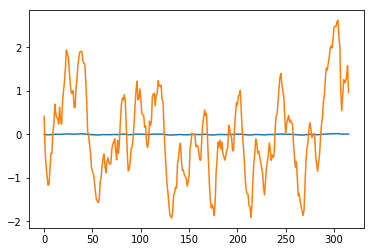

In [20]:
### zscore y#####
import matplotlib.pyplot as plt
from scipy import stats
from numpy import *
print(y.shape)
y = np.reshape(y, (791*316, 1, 32))
t = range(0, 316)
plt.plot(t, y[316*0: 316*1, 0,1])
y_norm = np.zeros((316*791, 1,32), dtype=float)
img_step = 315
cnt = 0
for num2 in range(np.shape(y)[0]):
    cnt += 1
    if cnt == (img_step + 1):
        cnt = 0
        y_norm[num2 - img_step: num2 + 1,:] = stats.zscore(y[num2 - img_step : num2 + 1,:])
        

where_are_NaNs = isnan(y_norm)
y_norm[where_are_NaNs] = 0
plt.plot(t, y_norm[316*0: 316*1, 0,1])

NameError: name 'y_norm' is not defined

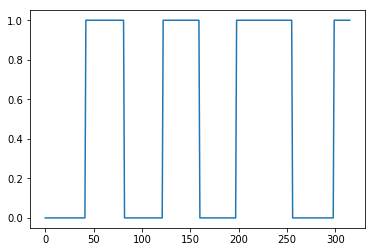

In [89]:
###plot task_cope and y_norm#####
import scipy.io as sio
t = range(0, 316)
task = sio.loadmat('/home/qing/Documents/HCP_Label/LANGUAGE_label.mat')
task_content = task['Label']

plt.plot(t,task_content[:,0])

plt.plot(t, y_norm[316*4:316*5, 0,14])##0##for new, there is three dimension
my_y_ticks = np.arange(-2, 3, 1)
plt.yticks(my_y_ticks)
temp = np.corrcoef(task_content[:,1],y_norm[316*4:316*5,0,14])
print('%.3f' % temp[0,1]) 

In [31]:
import scipy.io as sio
sio.savemat('Language_y_norm_20190116.mat', {'y_norm':y_norm})  
  

In [40]:
#### correlation matrix of networks and volumes ###
import numpy as np
import scipy.io as sio
sub_data = np.memmap('sub_LANGUAGE.mymemmap', dtype='float32', mode='r+', shape=(316*791,59421))

task = sio.loadmat('/home/qing/PycharmProjects/RAE/components_img_avg_norm.mat')
components_img_norm = task['components_img_avg_norm']

corr_net = np.zeros((791, 316, 32), dtype=float)
for i in range(4, 5):
    a = sub_data[i * 316 : (i + 1) * 316, :]
    for k in range(0, 316):
        c = a[k, :]
        for j in range(0, 32):
            b = components_img_norm[j, :]
            temp=np.corrcoef(c,b)
            corr_net[i,k,j] = temp[0,1]#i:subnumber k:timepoint of one sub j:networknumber


In [57]:
from scipy import stats
from numpy import *
print(np.shape(corr_net))
corr_net_norm = np.zeros((1,316,32),dtype = float)
# for num2 in range(np.shape(corr_net)[0]):
corr_net_norm[:,:] = stats.zscore(corr_net[549,:])
        


where_are_NaNs= isnan(corr_net_norm)
corr_net_norm[where_are_NaNs] = 0

(791, 316, 32)


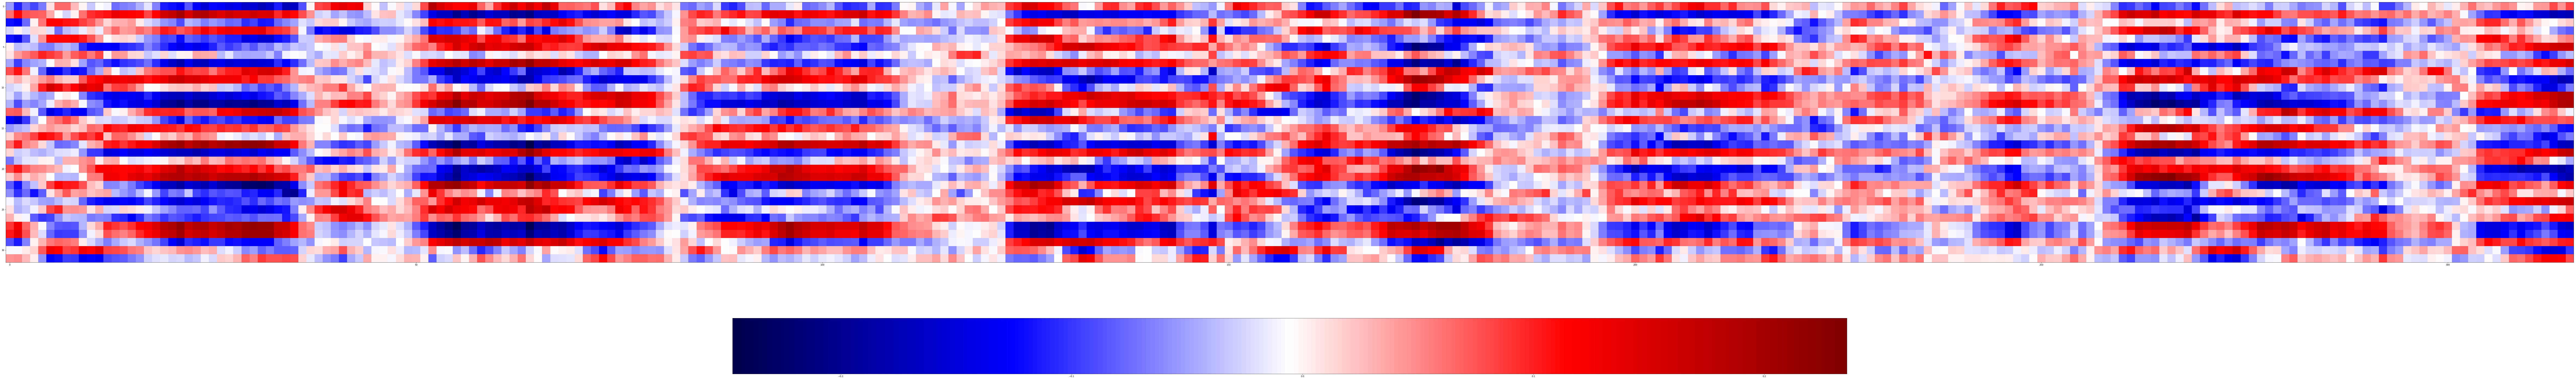

In [74]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(316, 32))
a = np.transpose(corr_net[349,:,:])
im = ax.imshow(a, cmap = 'seismic', interpolation='nearest',origin='upper')
fig.colorbar(im, orientation = 'horizontal')

In [22]:
##### fit networks by ElasticNet ####
from sklearn.linear_model import ElasticNet

y1 = np.squeeze(y_norm)

clf = ElasticNet(alpha=0.7, l1_ratio=0.005)
components_img = np.zeros((791,32, 59421), dtype = float)

for i in range(0,791):
    
    a=y1[i * 316 : (i + 1) * 316, :]
    b=sub_data[i * 316 : (i + 1) * 316, :]
    clf.fit(a, b)
    components_img[i,:,:] = np.transpose(clf.coef_)



In [25]:
components_img_avg = np.zeros((32,59421),dtype = float)
for i in range(0,59421):
    components_img_avg[:,i] = np.mean(components_img[:,:,i],axis = 0)


In [27]:
### zscore y#####
import matplotlib.pyplot as plt
from scipy import stats
from numpy import *
components_img_avg_norm = np.zeros((32,59421),dtype = float)
# print(components_img_GLM.shape)
for num2 in range(0,np.shape(components_img_avg)[0]):
    components_img_avg_norm[num2,:] = stats.zscore(components_img_avg[num2,:])
        


where_are_NaNs= isnan(components_img_avg_norm)
components_img_avg_norm[where_are_NaNs] = 0


In [28]:
import scipy.io as sio
sio.savemat('components_img_avg_norm2.mat', {'components_img_avg_norm':components_img_avg_norm})  
  

In [32]:
#### save patterns####
import nibabel as nib
import pandas as pd
from nibabel import cifti2 as ci


image = nib.load('/home/qing/Documents/tfMRI_Emotion_preproc/100307_3T_tfMRI_EMOTION_preproc/tfMRI_EMOTION_LR_Atlas_MSMAll1.dtseries.nii')
header = image.header
print(header)  
print(np.shape(image.get_data()))
#print(image.nifti_header.get_data_shape())
#image.update_headers()

image_to_write = image.get_data()
image_to_write[:, :] = 0
image_to_write[:32, :59421] = components_img_avg_norm

print(np.shape(image_to_write))
#print(image.nifti_header.get_data_shape())
#print(header)
write_img = ci.Cifti2Image(image_to_write, image.header, image.nifti_header)
nib.save(write_img, 'test_Language_791sub_LSTM_316back_norm_avg2.dtseries.nii')

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(176, 91282)
(176, 91282)


In [14]:
from sklearn.linear_model import ElasticNet
import scipy.io as sio
t = range(0, 316)
task = sio.loadmat('/home/qing/Documents/HCP_Label/LANGUAGE_label.mat')
task_content = task['Label']

clf_GLM = ElasticNet(alpha=0.7, l1_ratio=0.005)
components_img_GLM = np.zeros((791,2, 59421), dtype = float)

for i in range(0,791):
    
    a=task_content[:,0:2]
    b=sub_data[i * 316 : (i + 1) * 316, :]
    clf_GLM.fit(a, b)
    components_img_GLM[i,:,:] = np.transpose(clf_GLM.coef_)
 

In [15]:
components_img_GLM_avg = np.zeros((2,59421),dtype = float)
for i in range(0,59421):
    components_img_GLM_avg[:,i] = np.mean(components_img_GLM[:,:,i],axis = 0)
### zscore y#####
import matplotlib.pyplot as plt
from scipy import stats
from numpy import *
components_img_GLM_avg_norm = np.zeros((2,59421),dtype = float)
# print(components_img_GLM.shape)
for num2 in range(0,np.shape(components_img_GLM_avg)[0]):
    components_img_GLM_avg_norm[num2,:] = stats.zscore(components_img_GLM_avg[num2,:])

where_are_NaNs= isnan(components_img_GLM_avg_norm)
components_img_GLM_avg_norm[where_are_NaNs] = 0
import scipy.io as sio
sio.savemat('Language_components_img_GLM_norm.mat', {'components_img_GLM_avg_norm':components_img_GLM_avg_norm})  
  

In [92]:
#calculate the correlation of the GLM with the components
dataFile1 = '/home/qing/PycharmProjects/RAE/components_img_avg_norm.mat'
Language1 = sio.loadmat(dataFile1)
Language1 = Language1['components_img_avg_norm']

dataFile2 = '/home/qing/PycharmProjects/RAE/Language_components_img_GLM_norm.mat'
Language2 = sio.loadmat(dataFile2)
Language2 = Language2['components_img_GLM_avg_norm']

corr_map = np.corrcoef(Language1[11,:],Language2[0,:])
print(corr_map)

[[1.         0.91034937]
 [0.91034937 1.        ]]


In [83]:
####calculate the correlation of two times trials####

import scipy.io as scio
dataFile1 = '/home/qing/PycharmProjects/RAE/components_img_avg_norm.mat'
Language1 = scio.loadmat(dataFile1)
Language1 = Language1['components_img_avg_norm']
# Language1[Language1>0]=1
# Language1[Language1<0]=0
dataFile2 = '/home/qing/PycharmProjects/RAE/components_img_avg_norm2.mat'
Language2 = scio.loadmat(dataFile2)
Language2 = Language2['components_img_avg_norm']
# Language2[Language2>0]=1
# Language2[Language2<0]=0
# Language2[Language1==0]=0

# Language2[Language1==1]=1
# sum_1 = 59421-sum(Language1[8,:])
# sum_2 = 59421-sum(Language2[24,:])
sum_1 = sum(Language1[1,:])
sum_2 = sum(Language2[28,:])
print(sum_2/sum_1)
corr_network = np.corrcoef(Language1[11,:],Language2[14:])
print('%.3f' % corr_network[0,1])

-3.6666666666666665
0.902
